In [308]:
import matplotlib.pyplot as plt
import numpy as np
from bandits import Bandit
import random

In [260]:
bandits = [Bandit(random.random()*4-2) for i in range(10)]

In [262]:
def max_list(L):
    l1=[]
    for i in range(len(L)):
        if(L[i]==max(L)):
            l1.append(i)
    return random.choice(l1)

In [264]:
def run_greedy(n):
    ban_avg=[0 for i in range(10)]
    ban_no=[0 for i in range(10)]
    rewards=[]
    for i in range(n):
        a=max_list(ban_avg)
        q=bandits[a].pullLever()
        ban_no[a]+=1
        ban_avg[a]=ban_avg[a]+(1/ban_no[a])*(q-ban_avg[a])
        rewards.append(q)
    return rewards

In [266]:
def run_greedy_optimistic(n, o):
    ban_avg=[o for i in range(10)]
    ban_no=[0 for i in range(10)]
    rewards=[]
    for i in range(n):
        a=max_list(ban_avg)
        q=bandits[a].pullLever()
        ban_no[a]+=1
        ban_avg[a]=ban_avg[a]+(1/ban_no[a])*(q-ban_avg[a])
        rewards.append(q)
    return rewards

In [268]:
def run_greedy_epsilon(n, epsilon):
    ban_avg=[0 for i in range(10)]
    ban_no=[0 for i in range(10)]
    rewards=[]
    for i in range(n):
        if(random.random()<epsilon):
            a=random.randint(0, 9)
        else:
            a=max_list(ban_avg)
        q=bandits[a].pullLever()
        ban_no[a]+=1
        ban_avg[a]=ban_avg[a]+(1/ban_no[a])*(q-ban_avg[a])
        rewards.append(q)
    return rewards

In [286]:
def run_ucb(n, c):
    ban_avg=[0 for i in range(10)]
    ban_no=[0 for i in range(10)]
    rewards=[]
    ban_ucb=[0 for i in range(10)]
    for i in range(n):
        for j in range(10):
            if(ban_no[j])==0:
                ban_ucb[j]=1000
            else:
                ban_ucb[j]=ban_avg[j]+c*(np.log(i+1)/ban_no[j])**0.5
        a=max_list(ban_ucb)
        q=bandits[a].pullLever()
        ban_no[a]+=1
        ban_avg[a]=ban_avg[a]+(1/ban_no[a])*(q-ban_avg[a])
        rewards.append(q)
    return rewards

<function matplotlib.pyplot.show(close=None, block=None)>

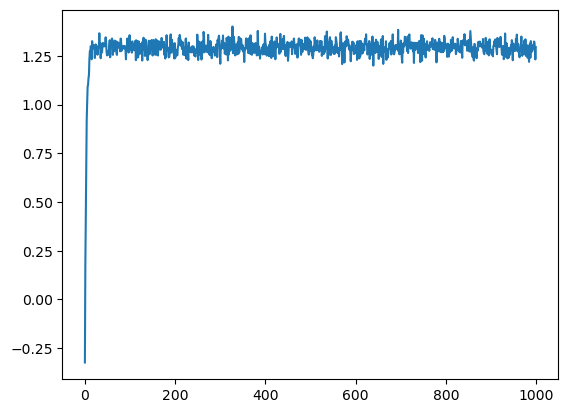

In [230]:
n=1000
k=1000
rewards=[0 for i in range(n)]
for i in range(k):
    temp_rew=run_greedy(n)
    for j in range(n):
        rewards[j]+=temp_rew[j]
for i in range(n):
    rewards[i]/=k
ys=rewards
xs=[x for x in range(n)]
plt.plot(xs, ys)
plt.show

In [ ]:
#Above is the graph for the greedy algorithm 

<function matplotlib.pyplot.show(close=None, block=None)>

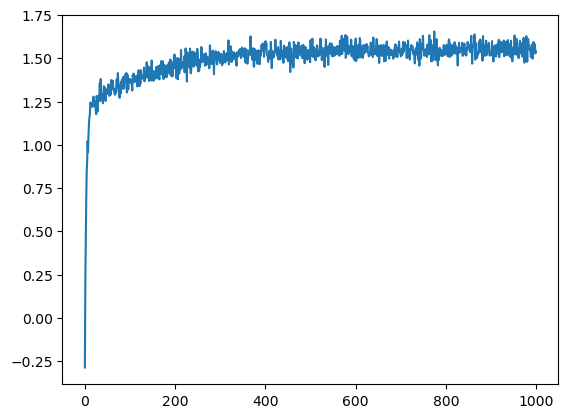

In [240]:
n=1000
k=1000
epsilon=0.05
rewards=[0 for i in range(n)]
for i in range(k):
    temp_rew=run_greedy_epsilon(n, epsilon)
    for j in range(n):
        rewards[j]+=temp_rew[j]
for i in range(n):
    rewards[i]/=k
ys=rewards
xs=[x for x in range(n)]
plt.plot(xs, ys)
plt.show

In [ ]:
#Above is the graph for the epsilon greedy algo with e=0.05

<function matplotlib.pyplot.show(close=None, block=None)>

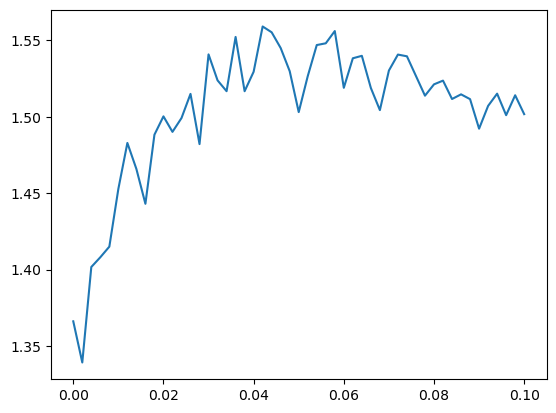

In [299]:
n=500
k=200
epsilon=np.linspace(0, 0.1, 51)
rewards_total=[0 for i in range(51)]
for q in range(51):
    rew=0
    rewards=[0 for i in range(n)]
    for i in range(k):
        temp_rew=run_greedy_epsilon(n, epsilon[q])
        for j in range(n):
            rewards[j]+=temp_rew[j]
    for i in range(n):
        rewards[i]/=k
        rew+=rewards[i]
    rew/=n
    rewards_total[q]=rew
ys=rewards_total
xs=epsilon
plt.plot(xs, ys)
plt.show

In [ ]:
#Above is the graph of avg rewards for various epsilon between 0 and 0.1, to show the optimal epsilon is between 0.04-0.06

<function matplotlib.pyplot.show(close=None, block=None)>

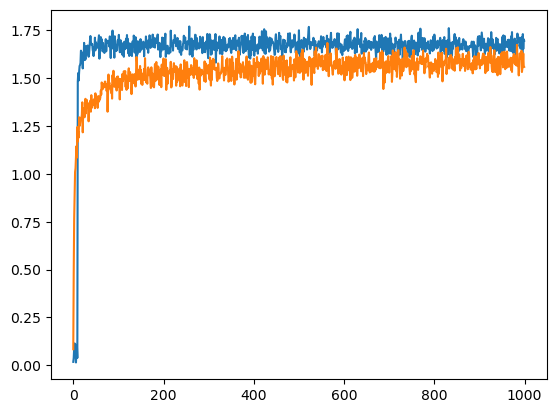

In [303]:
n=1000
k=1000
o=10
rewards=[0 for i in range(n)]
for i in range(k):
    temp_rew=run_greedy_optimistic(n, o)
    for j in range(n):
        rewards[j]+=temp_rew[j]
for i in range(n):
    rewards[i]/=k
ys=rewards
xs=[x for x in range(n)]
plt.plot(xs, ys)
plt.show
epsilon=0.1
rewards=[0 for i in range(n)]
for i in range(k):
    temp_rew=run_greedy_epsilon(n, epsilon)
    for j in range(n):
        rewards[j]+=temp_rew[j]
for i in range(n):
    rewards[i]/=k
ys=rewards
xs=[x for x in range(n)]
plt.plot(xs, ys)
plt.show

In [ ]:
#Above is a comparison of optimistic algo with Q=10(blue) and greedy epsilon with epsilon=0.1(orange)

<function matplotlib.pyplot.show(close=None, block=None)>

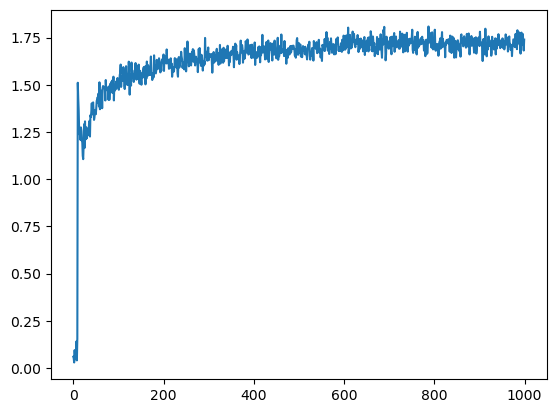

In [311]:
n=1000
k=1000
c=2
rewards=[0 for i in range(n)]
for i in range(k):
    temp_rew=run_ucb(n, c)
    for j in range(n):
        rewards[j]+=temp_rew[j]
for i in range(n):
    rewards[i]/=k
ys=rewards
xs=[x for x in range(n)]
plt.plot(xs, ys)
plt.show

In [ ]:
#Above is the ucb algorithm for c=2